In [2]:
import xgboost as xgb
import shap
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive', force_remount=False)

model_path = "/content/drive/MyDrive/Spotify_Project/6_Modeling/xgb_finetuned_model2.json"
loaded_model = xgb.Booster()
loaded_model.load_model(model_path)

print("Model loaded successfully from:", model_path)


Mounted at /content/drive
Model loaded successfully from: /content/drive/MyDrive/Spotify_Project/6_Modeling/xgb_finetuned_model2.json


In [9]:
X = pd.read_pickle("/content/drive/MyDrive/Spotify_Project/5_Data_Selection/spotify_selected_features2.pkl")
type(X), X.keys()

(dict,
 dict_keys(['X_train_sel', 'y_train', 'X_dev_sel', 'y_dev', 'X_test_sel', 'y_test', 'selected_features']))

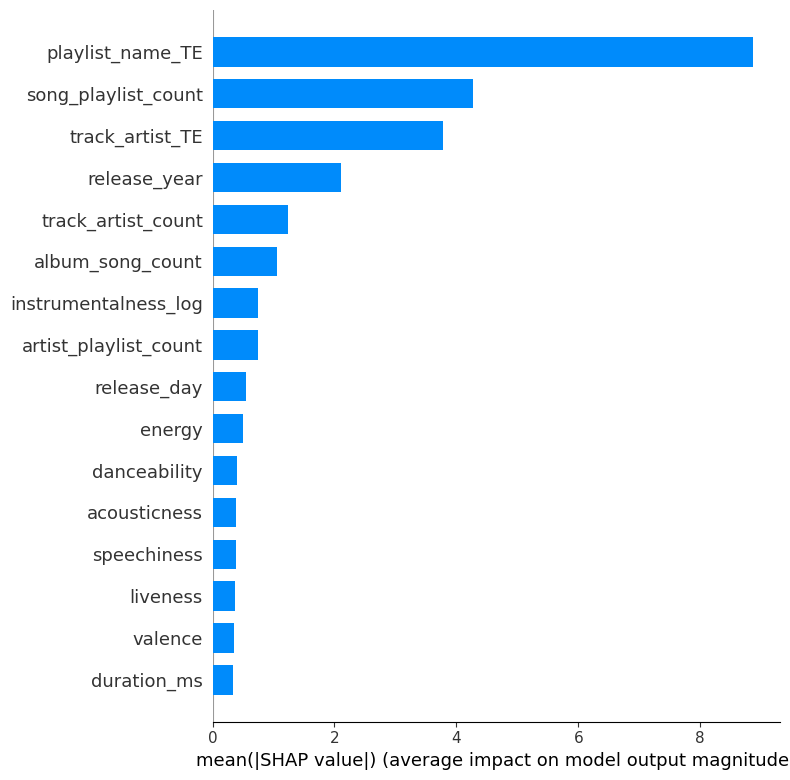

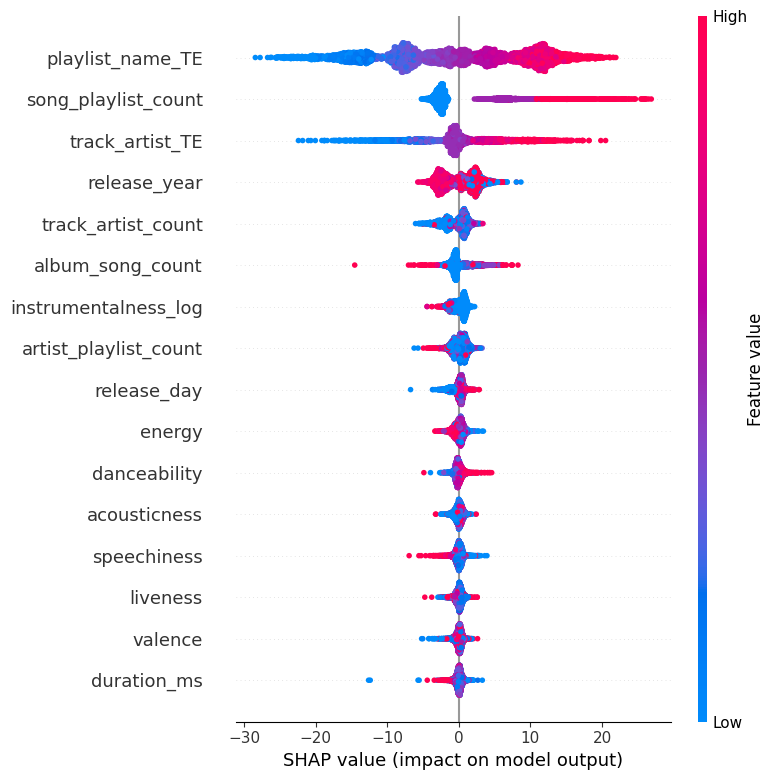

In [11]:
import pandas as pd, xgboost as xgb, shap, matplotlib.pyplot as plt

d = pd.read_pickle("/content/drive/MyDrive/Spotify_Project/5_Data_Selection/spotify_selected_features2.pkl")
X = d["X_test_sel"]

feat_order = list(d.get("selected_features", X.columns.tolist()))
X = X[feat_order].select_dtypes(include="number")

feature_names = list(X.columns.astype(str))

dtest = xgb.DMatrix(X, feature_names=feature_names)
shap_full = loaded_model.predict(dtest, pred_contribs=True)
base_vals = shap_full[:, -1]
shap_values = shap_full[:, :-1]

shap.summary_plot(shap_values, X, plot_type="bar")
plt.show()

shap.summary_plot(shap_values, X)
plt.show()

The SHAP results confirm that playlist- and artist-related exposure features
(**playlist_name_TE**, **song_playlist_count**, and **track_artist_TE**)
have the strongest positive impact on predicted track popularity.  

Newer release years also contribute positively, while intrinsic audio features
such as **energy**, **danceability**, and **instrumentalness_log**
play a smaller, secondary role.  

These findings align with the XGBoost feature-importance analysis and support
the conclusion that **playlist visibility and artist exposure are stronger drivers
of Spotify track popularity than audio characteristics.**